Here we test how the luminosity functions of AGB stars evolve 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
from jagb_func import custom_hist, simple_gaussian, GLOESS
from astropy.io import fits
from astropy.table import Table
from astropy.wcs import WCS
from scipy.special import erf
from scipy.optimize import curve_fit
from scipy import stats

In [3]:
t1 = Table.read('/Users/abigaillee/Photometry/M31 PHAT Photometry/Red uncor/All/0.fits')
t2 = Table.read('/Users/abigaillee/Photometry/M31 PHAT Photometry/Red uncor/All/1.fits')
t3 = Table.read('/Users/abigaillee/Photometry/M31 PHAT Photometry/Red uncor/All/2.fits')
t4 = Table.read('/Users/abigaillee/Photometry/M31 PHAT Photometry/Red uncor/All/3.fits')
t5 = Table.read('/Users/abigaillee/Photometry/M31 PHAT Photometry/Red uncor/All/4.fits')
t6 = Table.read('/Users/abigaillee/Photometry/M31 PHAT Photometry/Red uncor/All/5.fits')
t7 = Table.read('/Users/abigaillee/Photometry/M31 PHAT Photometry/Red uncor/All/6.fits')
t8 = Table.read('/Users/abigaillee/Photometry/M31 PHAT Photometry/Red uncor/All/7.fits')
t9 = Table.read('/Users/abigaillee/Photometry/M31 PHAT Photometry/Red uncor/All/8.fits')
t10 = Table.read('/Users/abigaillee/Photometry/M31 PHAT Photometry/Red uncor/All/9.fits')


In [35]:
t_empty =  Table([[0],[0]],names=['f110w_vega','f814w_vega'])
list_regions_full = [t1, t2, t3, t4, t5, t6, t7, t8, t9,t_empty ,t10]


In [30]:
color_cuts = [.6,.8, 1,1.2,1.4,1.6,1.8, 2.]


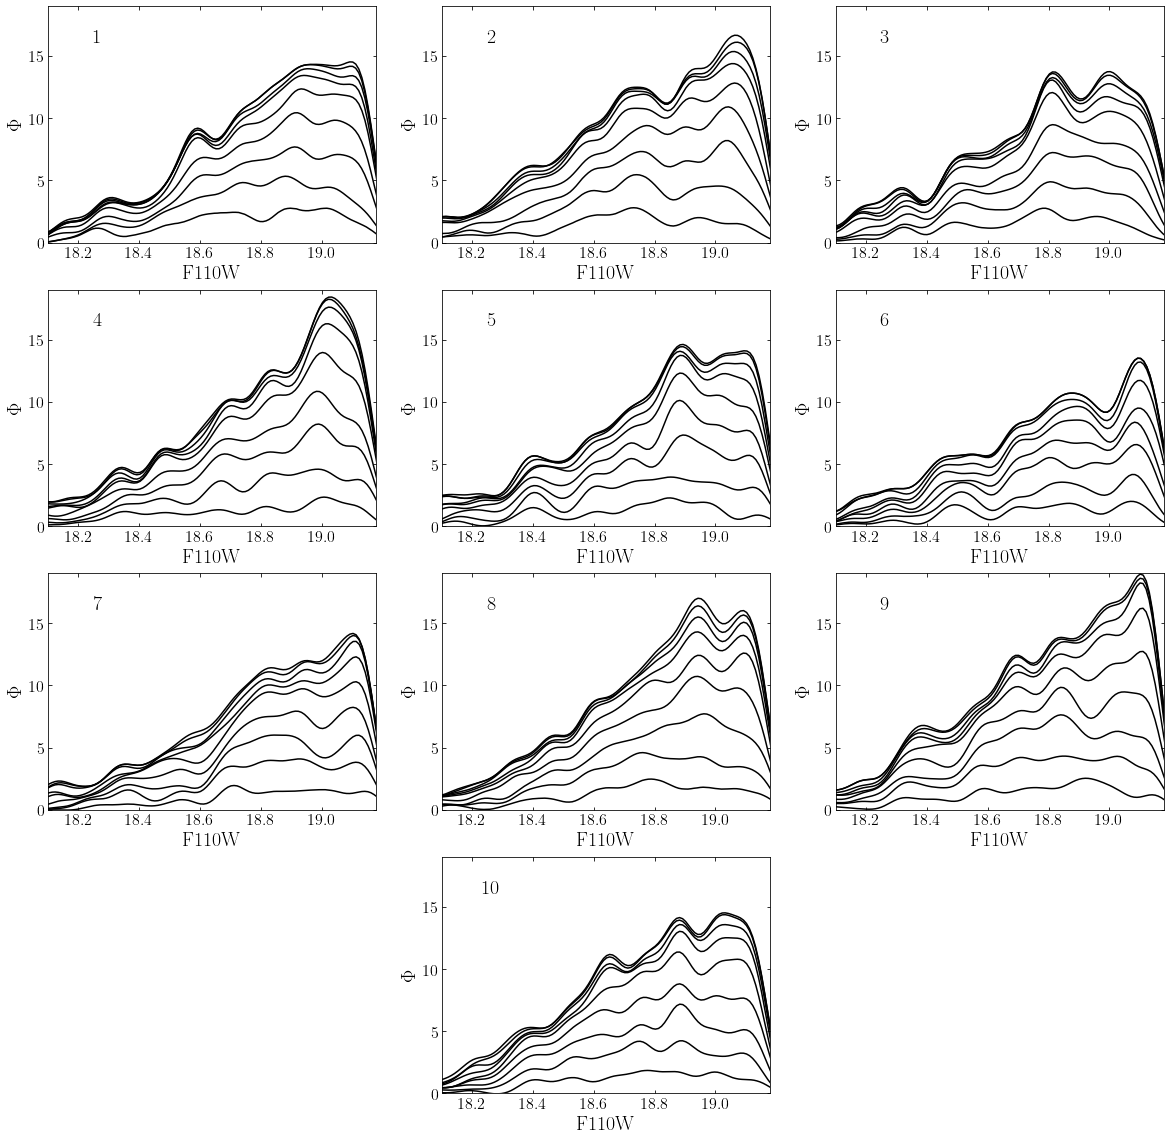

In [41]:
fig, axes = plt.subplots(4,3, figsize=(20,20))

for i, ax in enumerate(axes.flatten()):
    
    if i<9:
        ax.text(0.15,.85,str(i+1),fontsize=20, horizontalalignment='center',transform=ax.transAxes)
    if i==10:
        ax.text(0.15,.85,str(i),fontsize=20, horizontalalignment='center',transform=ax.transAxes)

    if i >10: 
        break
    if i!=9: # skip the "10th" table for formatting purposes
        

        for j in range(len(color_cuts)):

            table = list_regions_full[i]
            o_rich = table[(table['f110w_vega']<19.18)&((table['f814w_vega']-table['f110w_vega'])>color_cuts[j])&((table['f814w_vega']-table['f110w_vega'])<2.3)]

            c,N=custom_hist(o_rich['f110w_vega'], bin_size=.01) 
            s= GLOESS(c,N,  s=.07)
            ax.plot(c, s,color='black')



        ax.set_xlim(18.1,19.18)
        ax.set_ylim(0,19)



        ax.tick_params(direction='in')
        ax.xaxis.set_ticks_position('both')
        ax.yaxis.set_ticks_position('both')
        ax.set_yticks([0,5,10,15])
        ax.set_xticks([18.2,18.4,18.6,18.8, 19])

        ax.set_ylabel('$\Phi$',fontsize=20)
        ax.set_xticklabels(['18.2','18.4','18.6','18.8','19.0'], family='serif', fontsize=16)


        ax.set_xlabel('F110W',fontsize=20)
        ax.set_yticklabels(['0','5','10','15'], family='serif', fontsize=16)


    
    
fig.delaxes(axes[3,2]) 
fig.delaxes(axes[3,0]) 
plt.subplots_adjust(hspace=.2)
plt.subplots_adjust(wspace=.2)
plt.savefig('/Users/abigaillee/Documents/Research/M31 figures/evolution.png',dpi=300,bbox_inches='tight')